In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_excel (r'C:\Users\91986\Desktop\Data_Science_DataTrained\Project_16_to_20\Final_Train.xlsx')
df.head(15)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
5,BAMS,8 years experience,NaN,"Porur, Chennai",Ayurveda,NaN,100
6,BHMS,42 years experience,NaN,"Karol Bagh, Delhi",Homeopath,NaN,200
7,BDS,10 years experience,99%,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200
8,"MBBS, MD - General Medicine",14 years experience,NaN,"Old City, Hyderabad",General Medicine,NaN,100
9,"BSc, BDS",23 years experience,NaN,"Athani, Ernakulam",Dentist,NaN,100


In [10]:
#Lets check the shape
df.shape

(5961, 7)

In [11]:
#Lets check the Datatype
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [14]:
#Lets check the Value counts of different columns
df['Qualification'].value_counts()

BDS                                                                     488
BHMS                                                                    477
BAMS                                                                    471
MBBS                                                                    334
MBBS, MS - ENT                                                          220
                                                                       ... 
Post Graduate Diploma in Diabetology (PGDD), MD - Diabetology             1
Graduate Diploma in Family Medicine, Singapore, MBBS                      1
POST GRADUATE IN HOMOEOPATHY, BHMS                                        1
MBBS, DNB - Pulmonary Medicine, FCCS                                      1
BAMS, Post Graduate Diploma in Health, Family Welfare and Population      1
Name: Qualification, Length: 1420, dtype: int64

In [15]:
df['Place'].value_counts()

HSR Layout, Bangalore        75
Andheri West, Mumbai         70
Dwarka, Delhi                67
Banjara Hills, Hyderabad     64
Mulund West, Mumbai          54
                             ..
Nanjundapuram, Coimbatore     1
Gottigerre, Bangalore         1
Koovappady, Ernakulam         1
Rohini Sector 24, Delhi       1
Rohini Sector 2, Delhi        1
Name: Place, Length: 877, dtype: int64

In [16]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [17]:
df['Rating'].value_counts()

100%    684
98%     290
99%     259
97%     241
96%     220
95%     178
94%     115
93%     109
92%      66
90%      66
91%      60
89%      42
88%      41
85%      27
82%      23
83%      21
86%      21
80%      19
77%      16
87%      14
79%      13
84%      13
67%      12
81%      12
71%       9
76%       9
73%       8
75%       8
60%       7
74%       7
78%       6
68%       5
56%       5
70%       4
69%       4
57%       3
72%       3
63%       2
62%       2
64%       2
33%       2
55%       2
48%       1
53%       1
45%       1
7%        1
47%       1
36%       1
65%       1
58%       1
40%       1
Name: Rating, dtype: int64

In [18]:
#Lets drop some unimportant columns for model 
df.drop(['Qualification','Place'],axis=1,inplace=True)

In [19]:
df.head(10)

,Experience,Rating,Profile,Miscellaneous_Info,Fees
0,24 years experience,100%,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,12 years experience,98%,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,9 years experience,NaN,ENT Specialist,NaN,300
3,12 years experience,NaN,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,20 years experience,100%,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
5,8 years experience,NaN,Ayurveda,NaN,100
6,42 years experience,NaN,Homeopath,NaN,200
7,10 years experience,99%,Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200
8,14 years experience,NaN,General Medicine,NaN,100
9,23 years experience,NaN,Dentist,NaN,100


In [20]:
df['Profile'].value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

In [22]:
df.drop(['Miscellaneous_Info'],axis=1,inplace=True)

In [23]:
df.head(10)

,Experience,Rating,Profile,Fees
0,24 years experience,100%,Homeopath,100
1,12 years experience,98%,Ayurveda,350
2,9 years experience,NaN,ENT Specialist,300
3,12 years experience,NaN,Ayurveda,250
4,20 years experience,100%,Ayurveda,250
5,8 years experience,NaN,Ayurveda,100
6,42 years experience,NaN,Homeopath,200
7,10 years experience,99%,Dentist,200
8,14 years experience,NaN,General Medicine,100
9,23 years experience,NaN,Dentist,100


In [24]:
#lets convert Profile into the numical column
profile = pd.get_dummies(df['Profile'],drop_first=True)

In [25]:
profile

,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
0,0,0,0,0,1
1,0,0,0,0,0
2,0,0,1,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
5956,0,0,1,0,0
5957,0,0,0,1,0
5958,0,0,0,1,0
5959,0,0,0,1,0


In [26]:
df.drop(['Profile'],axis=1,inplace=True)

In [27]:
df = pd.concat([df,profile],axis=1)

In [28]:
df.head(10)

,Experience,Rating,Fees,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
0,24 years experience,100%,100,0,0,0,0,1
1,12 years experience,98%,350,0,0,0,0,0
2,9 years experience,NaN,300,0,0,1,0,0
3,12 years experience,NaN,250,0,0,0,0,0
4,20 years experience,100%,250,0,0,0,0,0
5,8 years experience,NaN,100,0,0,0,0,0
6,42 years experience,NaN,200,0,0,0,0,1
7,10 years experience,99%,200,1,0,0,0,0
8,14 years experience,NaN,100,0,0,0,1,0
9,23 years experience,NaN,100,1,0,0,0,0


In [31]:
#Lets Rate 50 in Rating 
rating = df['Rating'].fillna(50)

In [33]:
df.drop(['Rating'],axis=1,inplace=True)

In [34]:
df = pd.concat([df,rating],axis=1)
df.head(10)

,Experience,Fees,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath,Rating
0,24 years experience,100,0,0,0,0,1,100%
1,12 years experience,350,0,0,0,0,0,98%
2,9 years experience,300,0,0,1,0,0,50
3,12 years experience,250,0,0,0,0,0,50
4,20 years experience,250,0,0,0,0,0,100%
5,8 years experience,100,0,0,0,0,0,50
6,42 years experience,200,0,0,0,0,1,50
7,10 years experience,200,1,0,0,0,0,99%
8,14 years experience,100,0,0,0,1,0,50
9,23 years experience,100,1,0,0,0,0,50


In [36]:
df['Rating'].dtypes

dtype('O')

In [48]:
#lets drop Experience and Rating column as well
df.drop(['Experience','Rating'],inplace=True,axis=1)

In [49]:
df.head(15)

,Fees,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
0,100,0,0,0,0,1
1,350,0,0,0,0,0
2,300,0,0,1,0,0
3,250,0,0,0,0,0
4,250,0,0,0,0,0
5,100,0,0,0,0,0
6,200,0,0,0,0,1
7,200,1,0,0,0,0
8,100,0,0,0,1,0
9,100,1,0,0,0,0


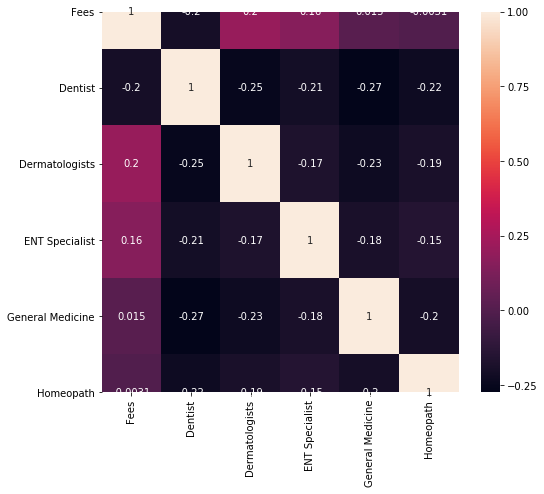

In [50]:
#lets check the correlation of the columns by heatmap
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(),annot=True)
plt.show()
#after checking we can see that 1 value is completely diagonal 
#so the heatmap shows columns are completely correlated with each other.

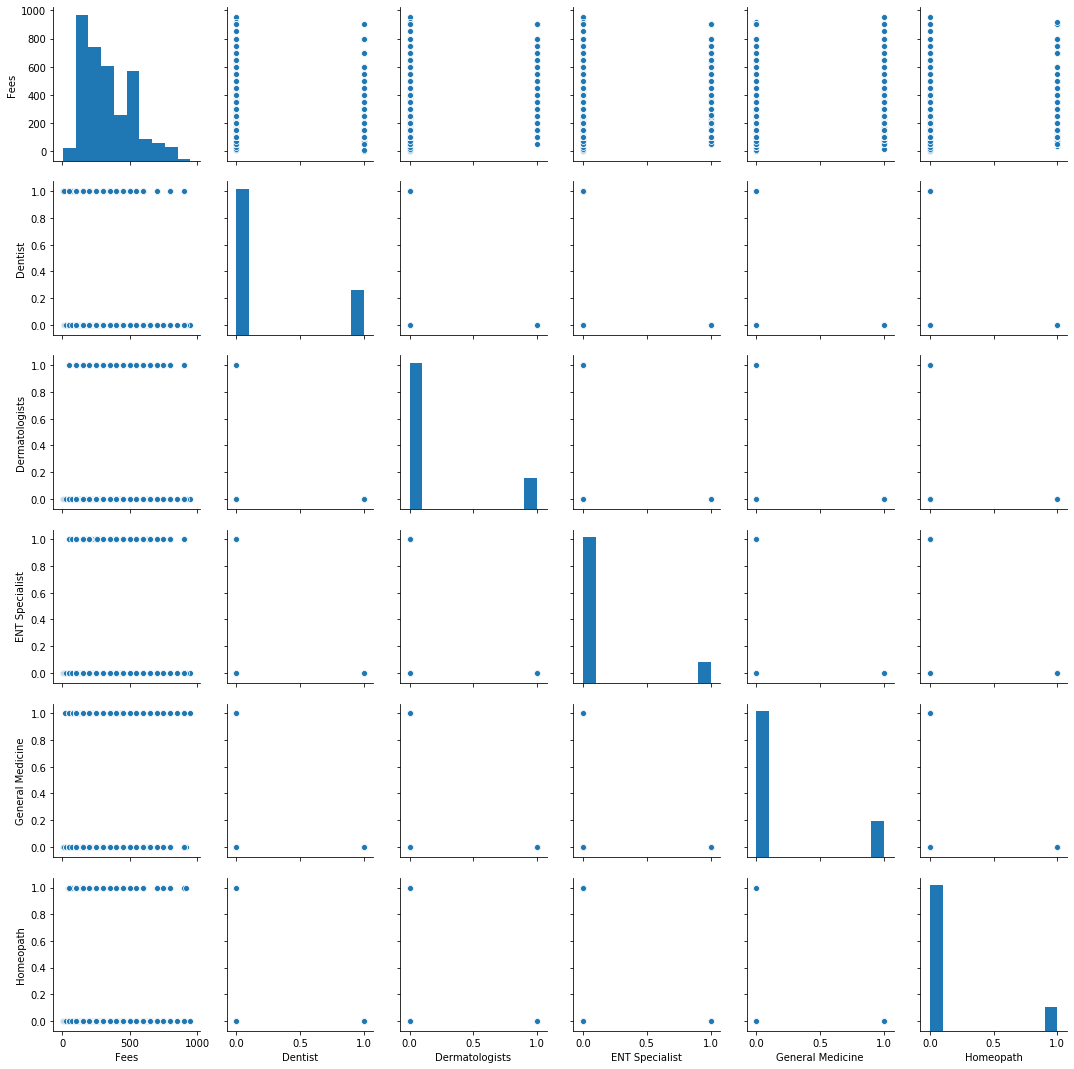

In [51]:
#lets check the regression parameters by pairplot
sns.pairplot(df)
plt.show()
#as per the plots and diagram shown in a graphical representation we can see this is a clear problem of linear regression
#so we will go ahead for the prediction with linear regression model

In [52]:
#Lets check the skewness
df.skew()

Fees                0.751870
Dentist             1.254545
Dermatologists      1.725211
ENT Specialist      2.308676
General Medicine    1.525779
Homeopath           2.058645
dtype: float64

In [53]:
#change the values in each columns by replacing log1 values
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [54]:
#now we will check for the Outliers and remove it for a better results
from scipy.stats import zscore
z_score = abs(zscore(df))
print(df.shape)
df_final = df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(5961, 6)
(5953, 6)


In [55]:
#lets separate x and y
df_x = df_final.drop(columns=["Fees"],axis=1)
y = df_final[["Fees"]]

In [56]:
#lets do Standar Scaling to scaled a data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x, columns=df_x.columns)

In [57]:
#lets split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [58]:
print(x_train.shape,x_test.shape)

(4167, 5) (1786, 5)


In [59]:
print(y_train.shape,y_test.shape)

(4167, 1) (1786, 1)


In [60]:
#lets create a function to call 

def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr = r2_score(y_test,y_pred)
        print("r2 score corresponding to",r_state,"is",r2_scr)
        if r2_scr > max_r_score:
            max_r_score = r2_scr
            final_r_state = r_state
    print("max r2 corrosponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [61]:
#lets apply first algorithm
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2 score corresponding to 42 is 0.0943473203633588
r2 score corresponding to 43 is 0.09531023514097092
r2 score corresponding to 44 is 0.09729934165562393
r2 score corresponding to 45 is 0.08651759169767037
r2 score corresponding to 46 is 0.09048406459210334
r2 score corresponding to 47 is 0.08431774321402696
r2 score corresponding to 48 is 0.04784652257405386
r2 score corresponding to 49 is 0.09580599698393555
r2 score corresponding to 50 is 0.0678795767869047
r2 score corresponding to 51 is 0.10519943996118641
r2 score corresponding to 52 is 0.05895494909157761
r2 score corresponding to 53 is 0.07332972200112109
r2 score corresponding to 54 is 0.03851106765504997
r2 score corresponding to 55 is 0.07504774245800339
r2 score corresponding to 56 is 0.10509378589355578
r2 score corresponding to 57 is 0.09184585386800981
r2 score corresponding to 58 is 0.07327483186083694
r2 score corresponding to 59 is 0.080962712995024
r2 score corresponding to 60 is 0.07976471101746896
r2 score corresp

In [62]:
#lets go for the next model and find out the best parameter
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors = {"n_neighbors":range(1,30)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr, neighbors , cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 23}

In [63]:
#lets apply and get the r2 score
knr = KNeighborsRegressor(n_neighbors=23)
r_state=maxr2_score(knr,x,y)

r2 score corresponding to 42 is -0.010837219541864895
r2 score corresponding to 43 is -0.0023082731890811115
r2 score corresponding to 44 is 0.05623629967379773
r2 score corresponding to 45 is 0.05802181414835894
r2 score corresponding to 46 is 0.07054302033500259
r2 score corresponding to 47 is 0.0174361900800607
r2 score corresponding to 48 is 0.017841709350738588
r2 score corresponding to 49 is 0.06840340700318803
r2 score corresponding to 50 is 0.03560468413337314
r2 score corresponding to 51 is 0.04184942331926911
r2 score corresponding to 52 is 0.004734523678626146
r2 score corresponding to 53 is 0.03091926652221666
r2 score corresponding to 54 is 0.0403900819980908
r2 score corresponding to 55 is 0.040556662873467264
r2 score corresponding to 56 is 0.05582932752127567
r2 score corresponding to 57 is 0.06029743302566226
r2 score corresponding to 58 is 0.05718527760988712
r2 score corresponding to 59 is 0.07006818012141647
r2 score corresponding to 60 is 0.06832425811754639
r2 sco

In [64]:
#lets check mean r2 score of both of linear regression model and knn regression
from sklearn.model_selection import cross_val_score
print("mean r2 score of linear regression is ",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("mean standard deviation in r2 score of linear regression is ",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())
print()
print("mean r2 score of knn regression is ",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("mean standard deviation in r2 score of knn regression is ",cross_val_score(knr,x,y,cv=5,scoring="r2").std())

mean r2 score of linear regression is  0.08376840501589469
mean standard deviation in r2 score of linear regression is  0.012545746757101474

mean r2 score of knn regression is  0.06289513144226824
mean standard deviation in r2 score of knn regression is  0.023674379848139502


In [65]:
#lets check laso regression 
from sklearn.linear_model import Lasso
lsreg = Lasso()
parameters = {"alpha":[0.001,0.01,1]}
clf = GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [66]:
lsreg = Lasso(alpha=0.001)
r_state=maxr2_score(lsreg,x,y)

r2 score corresponding to 42 is 0.09377582028735465
r2 score corresponding to 43 is 0.09498086990344001
r2 score corresponding to 44 is 0.09678651819165884
r2 score corresponding to 45 is 0.08560145939708064
r2 score corresponding to 46 is 0.09026816669137616
r2 score corresponding to 47 is 0.08427464907977478
r2 score corresponding to 48 is 0.04801381190379139
r2 score corresponding to 49 is 0.09490875857460446
r2 score corresponding to 50 is 0.06821728625220402
r2 score corresponding to 51 is 0.10453354973748563
r2 score corresponding to 52 is 0.05930131667556271
r2 score corresponding to 53 is 0.07395878545734957
r2 score corresponding to 54 is 0.03963055700143514
r2 score corresponding to 55 is 0.07531712929660206
r2 score corresponding to 56 is 0.10443048340141137
r2 score corresponding to 57 is 0.09169406042751571
r2 score corresponding to 58 is 0.07302755978765607
r2 score corresponding to 59 is 0.08099103716840994
r2 score corresponding to 60 is 0.08015509981096525
r2 score cor

In [67]:
print("mean r2 score of Lasso regression is ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").mean())
print("mean standard deviation in r2 score of Lasso regression is ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").std())
print()

mean r2 score of Lasso regression is  0.08370678052633292
mean standard deviation in r2 score of Lasso regression is  0.012351732690094644



In [68]:
#now we will try to use gradiant boosting techniques
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
parameters = {"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf = GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [69]:
gbr = GradientBoostingRegressor(learning_rate=0.1,n_estimators=500)
print("mean r2 score of gb regression is ",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("mean standard deviation in r2 score of gb regression is ",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())
print()

mean r2 score of gb regression is  0.08376847485633429
mean standard deviation in r2 score of gb regression is  0.012545259775520743



In [70]:
#We will go ahead with knr model as it shows 

In [71]:
#after applying these algorithms i came to know that knr model is a good one 
#So i will go ahead with knr model

from sklearn.externals import joblib


In [72]:
joblib.dump(knr, 'doctorfees_model.pkl')

['doctorfees_model.pkl']